In [1]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os 
import shutil

In [2]:
df = pd.read_csv('Info_Images.csv')
df

_unit_id  _golden _unit_state  _trusted_judgments  \
0      1023132475    False   finalized                   1   
1      1023132476    False   finalized                   1   
2      1023132477    False   finalized                   1   
3      1023132478    False   finalized                   1   
4      1023132479    False   finalized                   1   
...           ...      ...         ...                 ...   
64079  1023379621     True      golden                 171   
64080  1023379637     True      golden                 174   
64081  1023379644     True      golden                 188   
64082  1023379660     True      golden                 182   
64083  1023379672     True      golden                 159   

        _last_judgment_at  \
0      8/19/2016 17:00:25   
1      8/19/2016 17:00:48   
2      8/19/2016 17:01:43   
3      8/19/2016 17:01:04   
4      8/19/2016 17:00:48   
...                   ...   
64079                 NaN   
64080                 NaN   
64081                 NaN   
64082                 NaN   
64083                 NaN   

      please_select_the_gender_of_the_person_in_the_picture  \
0                                                   male      
1                                                   male      
2                                                   male      
3                                                   male      
4                                                   male      
...                                                  ...      
64079                                               male      
64080                                               male      
64081                                             unsure      
64082                                               male      
64083                                               male      

       please_select_the_gender_of_the_person_in_the_picture:confidence  \
0                                                    1.0                  
1                                                    1.0                  
2                                                    1.0                  
3                                                    1.0                  
4                                                    1.0                  
...                                                  ...                  
64079                                                1.0                  
64080                                                1.0                  
64081                                                1.0                  
64082                                                1.0                  
64083                                                1.0                  

                                               image_url  \
0      https://d1qb2nb5cznatu.cloudfront.net/users/40...   
1      https://d1qb2nb5cznatu.cloudfront.net/users/42...   
2      https://d1qb2nb5cznatu.cloudfront.net/users/44...   
3      https://d1qb2nb5cznatu.cloudfront.net/users/47...   
4      https://d1qb2nb5cznatu.cloudfront.net/users/50...   
...                                                  ...   
64079  https://d1qb2nb5cznatu.cloudfront.net/users/16...   
64080  https://d1qb2nb5cznatu.cloudfront.net/users/15...   
64081  https://d1qb2nb5cznatu.cloudfront.net/users/89...   
64082  https://d1qb2nb5cznatu.cloudfront.net/users/95...   
64083  https://d1qb2nb5cznatu.cloudfront.net/users/66...   

      please_select_the_gender_of_the_person_in_the_picture_gold  user_id  
0                                                    NaN               40  
1                                                    NaN               42  
2                                                    NaN               44  
3                                                    NaN               47  
4                                                    NaN               50  
...                                                  ...              ...  
6407

In [3]:
male_df = df[df['please_select_the_gender_of_the_person_in_the_picture']=='male'].sample(1500)
female_df = df[df['please_select_the_gender_of_the_person_in_the_picture']=='female'].sample(1500)

In [4]:
if os.path.exists('./image') is False:
    os.mkdir('./image')

if os.path.exists('./image/male') is False:
    os.mkdir('./image/male')
    
if os.path.exists('./image/female') is False:
    os.mkdir('./image/female')

In [5]:
i = 1
for idx, mv in enumerate(male_df['image_url'].values):
    url = mv
    try:
        fname = f"./image/male/male_{i}.jpg"
        urllib.request.urlretrieve(url, fname)
        i += 1
        if i >1000:
            break
    except Exception as e:
        print(e)
        pass


HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden


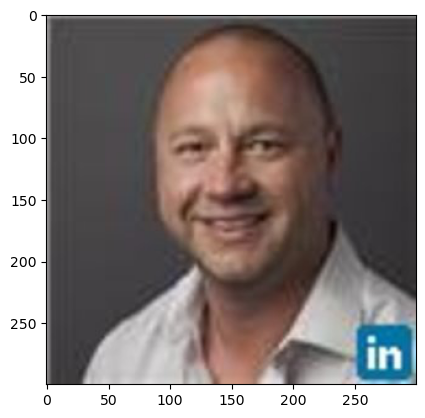

In [6]:
male_sample = plt.imread('./image/male/male_1.jpg')
plt.imshow(male_sample)

In [7]:
i = 1
for idx, fmv in enumerate(female_df['image_url'].values):
    url = fmv
    try:
        urllib.request.urlretrieve(url, f"./image/female/female_{i}.jpg")
        i += 1
        if i > 1000:
            break
    except Exception as e:
        print(e)
        pass

HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden
HTTP Error 403: Forbidden


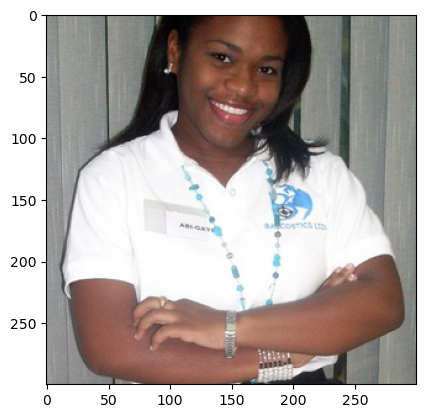

In [8]:
female_sample = plt.imread('./image/female/female_1.jpg')
plt.imshow(female_sample)

In [9]:
female_sample.shape

(300, 300, 3)

In [10]:

base_dir = './image'

train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
if os.path.exists(train_dir) is False: os.mkdir(train_dir) 
if os.path.exists(test_dir) is False: os.mkdir(test_dir) 


train_male_dir = os.path.join(base_dir,'train/male')
train_female_dir = os.path.join(base_dir,'train/female')
test_male_dir = os.path.join(base_dir,'test/male')
test_female_dir = os.path.join(base_dir,'test/female')

if os.path.exists(train_male_dir) is False: os.mkdir(train_male_dir) 
if os.path.exists(train_female_dir) is False: os.mkdir(train_female_dir) 

if os.path.exists(test_male_dir) is False: os.mkdir(test_male_dir) 
if os.path.exists(test_female_dir) is False: os.mkdir(test_female_dir) 


In [11]:
org_male_dir = './image/male'
male_files = os.listdir(org_male_dir)

for i, fname in enumerate(male_files):
    if(len(male_files) - i <= len(male_files)*0.2):
        src = os.path.join(org_male_dir, fname)
        dst = os.path.join(test_male_dir, fname)
        shutil.copyfile(src, dst)
    else:
        src = os.path.join(org_male_dir, fname)
        dst = os.path.join(train_male_dir, fname)
        shutil.copyfile(src, dst)

shutil.rmtree(org_male_dir)

In [12]:
org_female_dir = './image/female'
female_files = os.listdir(org_female_dir)

for i, fname in enumerate(female_files):
    if(len(female_files) - i <= len(female_files)*0.2):
        src = os.path.join(org_female_dir, fname)
        dst = os.path.join(test_female_dir, fname)
        shutil.copyfile(src, dst)
    else:
        src = os.path.join(org_female_dir, fname)
        dst = os.path.join(train_female_dir, fname)
        shutil.copyfile(src, dst)

shutil.rmtree(org_female_dir)

In [13]:
print('Train Male 이미지 개수:',len(os.listdir(train_male_dir)))
print('Test Male 이미지 개수:',len(os.listdir(test_male_dir)))

print('Train Female 이미지 개수:',len(os.listdir(train_female_dir)))
print('Test Female 이미지 개수:',len(os.listdir(test_female_dir)))


Train Male 이미지 개수: 800
Test Male 이미지 개수: 200
Train Female 이미지 개수: 800
Test Female 이미지 개수: 200


In [14]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import RandomSampler, DataLoader

In [15]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)
device = torch.device('cuda:0' if USE_CUDA else 'cpu')



True


In [16]:

# batch_size = 32
# learing_rate = 0.01 # 0.00001
# num_epoch = 1000
mean=[0.5, 0.5, 0.5]
std=[0.5, 0.5, 0.5]

batch_size = 64
num_workers = 4

n_steps = 10000

train_img_dir = './image/train'
test_img_dir = './image/test'


train_dataset = dset.ImageFolder(train_img_dir,
                                 transform= transforms.Compose([
                                      transforms.Resize(128),  #
                                      transforms.RandomRotation(30),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean,std)
                            ]))

test_dataset = dset.ImageFolder(test_img_dir, transform=transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor(),
                                      transforms.Normalize(mean=mean,
                                                             std=std)]))


sampler = RandomSampler(train_dataset,
                        replacement=True,
                        num_samples=batch_size * n_steps)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size,
                              sampler=sampler, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size,
                             shuffle=False, num_workers=num_workers)


In [17]:

import torch.nn.functional as F
class block(nn.Module):
    def __init__(self, dim_1, dim_2, stride=1):
        super(block, self).__init__()
        self.conv1 = nn.Conv2d(dim_1, dim_2, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(dim_2)
        self.conv2 = nn.Conv2d(dim_2, dim_2, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(dim_2)

        self.shortcut = nn.Sequential()
        if stride != 1 or dim_1 != dim_2:
            self.shortcut = nn.Sequential(
                nn.Conv2d(dim_1, dim_2, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(dim_2)
            )

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)  



    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Model(nn.Module):
    def __init__(self, num_classes=2):
        super(Model, self).__init__()
        self.in_dim = 32

        self.conv1 = nn.Conv2d(3, self.in_dim, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_dim)
        self.layer1 = self._make_layer(32*2, 2, stride=1)
        self.layer2 = self._make_layer(32*4, 2, stride=2)
        self.layer3 = self._make_layer(32*8, 2, stride=2)
        self.layer4 = self._make_layer(32*8, 2, stride=2)
        self.layer5 = self._make_layer(32*16, 2, stride=2)

        self.clf = nn.Sequential(nn.AdaptiveAvgPool2d((1, 1)), 
                                        nn.Flatten(), 
                                        nn.Linear(32*16, num_classes),
                                        nn.LogSoftmax(dim=-1))

    def _make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_dim, planes, stride))
            self.in_dim = planes
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.clf(out)

        return out

In [18]:
import numpy as np
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):

        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.best_model = model
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
            self.best_score = score
            return self.best_model
        else:
            print(f'Validation loss decreased ({-self.best_score:.6f} --> {val_loss:.6f}).')
            self.best_score = score
            self.best_model = model
            # self.save_checkpoint(val_loss, model)
            self.counter = 0
            return self.best_model

    def save_checkpoint(self, val_loss, model):
        '''validation loss가 감소하면 모델을 저장한다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).')
        # torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [19]:
lr = 1e-3
momentum = 0.9
weight_decay = 1e-5
epoch = 20

model = Model()

early_stopping = EarlyStopping(patience=5, verbose=True)
best_model = None
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)

model = model.to(device)

In [20]:
tr_loss, tr_acc = [], []
val_loss, val_acc = [], []

tr_total, tr_correct = 0, 0
train_loss = 0

for step, (x, y) in enumerate(train_dataloader, start=1):
    model.train()
    x, y = x.to(device), y.to(device)
    
    optimizer.zero_grad()
    pred = model(x)
    loss = criterion(pred, y)
    
    train_loss += loss * x.shape[0]
    tr_total += x.shape[0]    
    tr_correct += (pred.max(dim=1)[1] == y).sum()
    loss.backward()
    optimizer.step()
    scheduler.step()
    
    # Summary & Eval
    if step % 100 == 0:
        train_loss /= tr_total
        acc_tr = tr_correct / tr_total
    
        tr_loss.append(train_loss)
        tr_acc.append(acc_tr)

        tr_total, tr_correct = 0, 0
        train_loss = 0
        total, correct = 0, 0
        test_loss = 0
        model.eval()
        for x, y in test_dataloader:
            x, y = x.to(device), y.to(device)

            # Don't compute gradient during evaluation
            with torch.no_grad():
                pred = model(x)

            test_loss += criterion(pred, y) * x.shape[0]

            total += x.shape[0]
            correct += (pred.max(dim=1)[1] == y).sum()

        test_loss /= total
        val_loss.append(test_loss)
        accuracy = correct / total
        val_acc.append(accuracy)
        print(f"[Step {step}] train_loss: {loss.detach().squeeze():.2f}, test_loss: {test_loss:.2f}, test_accuracy: {accuracy:.4f}")

        best_model = early_stopping(test_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break
model = best_model

[Step 100] train_loss: 0.53, test_loss: 0.66, test_accuracy: 0.6500
Validation loss decreased (inf --> 0.657986).
[Step 200] train_loss: 0.61, test_loss: 0.69, test_accuracy: 0.6625
EarlyStopping counter: 1 out of 5
[Step 300] train_loss: 0.49, test_loss: 0.60, test_accuracy: 0.6925
Validation loss decreased (0.690859 --> 0.598189).
[Step 400] train_loss: 0.51, test_loss: 0.70, test_accuracy: 0.6775
EarlyStopping counter: 1 out of 5
[Step 500] train_loss: 0.47, test_loss: 0.58, test_accuracy: 0.7225
Validation loss decreased (0.697166 --> 0.584393).
[Step 600] train_loss: 0.36, test_loss: 0.59, test_accuracy: 0.7300
EarlyStopping counter: 1 out of 5
[Step 700] train_loss: 0.50, test_loss: 0.66, test_accuracy: 0.6850
EarlyStopping counter: 2 out of 5
[Step 800] train_loss: 0.46, test_loss: 1.15, test_accuracy: 0.6900
EarlyStopping counter: 3 out of 5
[Step 900] train_loss: 0.43, test_loss: 0.64, test_accuracy: 0.7100
Validation loss decreased (1.146295 --> 0.636110).
[Step 1000] train_l

[Step 7500] train_loss: 0.01, test_loss: 0.79, test_accuracy: 0.8600
EarlyStopping counter: 1 out of 5
[Step 7600] train_loss: 0.00, test_loss: 0.74, test_accuracy: 0.8575
Validation loss decreased (0.786845 --> 0.741275).
[Step 7700] train_loss: 0.17, test_loss: 0.73, test_accuracy: 0.8600
Validation loss decreased (0.741275 --> 0.731409).
[Step 7800] train_loss: 0.02, test_loss: 0.76, test_accuracy: 0.8650
EarlyStopping counter: 1 out of 5
[Step 7900] train_loss: 0.00, test_loss: 0.74, test_accuracy: 0.8550
Validation loss decreased (0.759668 --> 0.740243).
[Step 8000] train_loss: 0.02, test_loss: 0.79, test_accuracy: 0.8500
EarlyStopping counter: 1 out of 5
[Step 8100] train_loss: 0.01, test_loss: 0.76, test_accuracy: 0.8650
Validation loss decreased (0.788935 --> 0.756177).
[Step 8200] train_loss: 0.01, test_loss: 0.80, test_accuracy: 0.8675
EarlyStopping counter: 1 out of 5
[Step 8300] train_loss: 0.00, test_loss: 0.81, test_accuracy: 0.8725
EarlyStopping counter: 2 out of 5
[Step

In [38]:
train_loss_list = [l.detach().cpu().numpy() for l in tr_loss]
train_acc_list = [l.detach().cpu().numpy() for l in tr_acc]
val_loss_list = [l.detach().cpu().numpy() for l in val_loss]
val_acc_list = [l.detach().cpu().numpy() for l in val_acc]

In [40]:
plt.plot(train_loss_list, label='train_loss')
plt.plot(val_loss_list, label='val_loss')
plt.legend(loc='best')

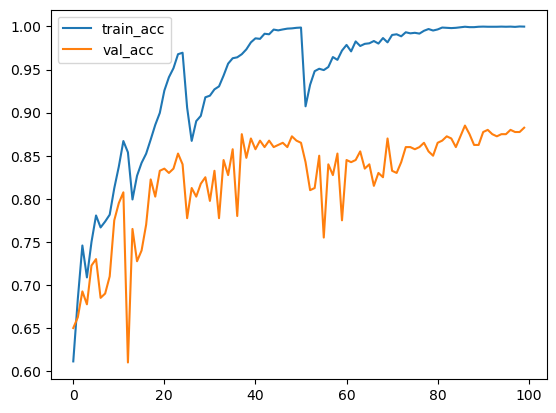

In [41]:
plt.plot(train_acc_list, label='train_acc')
plt.plot(val_acc_list, label='val_acc')
plt.legend(loc='best')